In [8]:
!pip install pycaret

  Using cached pycaret-3.3.1-py3-none-any.whl.metadata (17 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl.metadata (15 kB)
  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached plotly-5.21.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached schemdraw-0.15-py3-none-any.whl.metadata (2.2 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 k

In [3]:
!pip install pandas

In [4]:
!pip install pandas --index-url=https://pypi.org/simple/

Looking in indexes: https://pypi.org/simple/


In [7]:
!pip install --upgrade pip

In [9]:
import pandas as pd
import pycaret

In [10]:
def load_data(file_path):
    """
    Function to load data from file_path.
    """
    # Implement code to load data using pandas
    data = pd.read_csv(file_path)
    return data

In [11]:
data = load_data('diabetes.csv')

In [12]:
def read_csv_file(file_path):
    return pd.read_csv(file_path)

In [13]:
file_path = 'diabetes.csv'  # Replace 'train.csv' with the path to your CSV file
df = read_csv_file(file_path)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

#Handling Missing Values:

In [14]:
def handle_missing_values(df, column_name, method='assign', value=None):
    """
    Function to handle missing values in a specific column of a DataFrame.
    
    Parameters:
    df (DataFrame): Input DataFrame.
    column_name (str): Name of the column containing missing values.
    method (str): Method to handle missing values. Options: 'assign', 'drop'.
    value: The value used for imputation if method='assign'.
    
    Returns:
    df_handled (DataFrame): DataFrame with missing values handled according to the specified method.
    """
    df_handled = df.copy()  # Create a copy of the original DataFrame
    
    if method == 'assign':
        # Assign a specific value to missing values in the specified column
        df_handled[column_name].fillna(value, inplace=True)
    elif method == 'drop':
        # Drop rows with missing values in the specified column
        df_handled.dropna(subset=[column_name], inplace=True)
    else:
        raise ValueError("Invalid method. Choose between 'assign' and 'drop'.")

    return df_handled

In [15]:
df_assigned = handle_missing_values(df, 'SkinThickness', method='assign', value=0)

df_dropped = handle_missing_values(df, 'Pregnancies', method='drop')

In [16]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [17]:
def check_null_values(df):
    return df.isnull()

In [18]:
null_values = check_null_values(df)
print(null_values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [19]:
def check_missing_values(df):
    """
    Function to check missing values in a DataFrame.
    
    Parameters:
    df (DataFrame): Input DataFrame.
    
    Returns:
    missing_values (Series): Series containing the count of missing values for each column.
    """
    missing_values = df.isnull().sum()
    return missing_values

In [20]:
# Assuming df is your DataFrame
missing_values_counts = check_missing_values(df)
print(missing_values_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def create_label_encoder():
    return LabelEncoder()

In [23]:
label_encoder = create_label_encoder()

In [24]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [25]:
label_encoder.fit_transform(df['Insulin'])

array([  0,   0,   0,  62, 102,   0,  57,   0, 179,   0,   0,   0,   0,
       185, 105,   0, 129,   0,  52,  64, 131,   0,   0,   0,  90,  73,
         0,  86,  70,   0,   0, 134,  26,   0,   0, 116,   0,   0,   0,
       123,  40,   0,   0, 133,   0,   0,   0,   0,   0,   0,  51,  10,
         6, 152, 162,   0, 153,  70,   0,  87,   0,   0,   0,  81,   0,
         0,   0,   0,  12,  66,  59,  86,   0, 140,   0,   0,   0,   0,
         0,   0,   0,   0,  41,   0,   0,  78,   0,  41,  70,   0,   0,
       106,  20,   0,  35, 128,   0,  46,  35, 126,   0,   0,   0,  13,
         0,  93,   0,  86,   4,  10,  85, 176,  11,   0, 105,   0,   0,
         0,   0,  23,  66,   0,  66,   0,   0,  65,  85,  62,  89,   0,
       102,   0, 127,   0,  21,  86,  22,  61,   0, 157,   0,   0,  34,
         0, 148,   0,   0,  75,   0,   0, 121,   0,  94, 175,   0,   0,
        62,  85,  25,  72,   0,  67, 149,   0,   0,  95,   0,   0,   0,
        48,   0,  83,   0,  20,  27,  83,   0,  83,   0,   0,   

In [26]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
from pycaret.classification import *
s = setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [28]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [29]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,1.4350
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0280
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0320
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2260
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0250
gbc,Gradient Boosting Classifier,0.7373,0.7914,0.5550,0.6445,0.5931,0.4013,0.4059,0.1620
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1180
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1470
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0330
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0290
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0220
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0250
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.1810
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0240
gbc,Gradient Boosting Classifier,0.7373,0.7914,0.5550,0.6445,0.5931,0.4013,0.4059,0.1500
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0970
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1670
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0230
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1080


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [30]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [31]:
# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

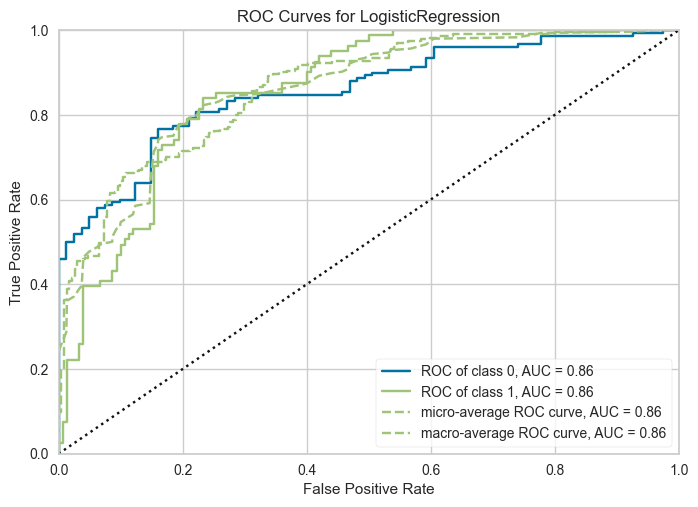

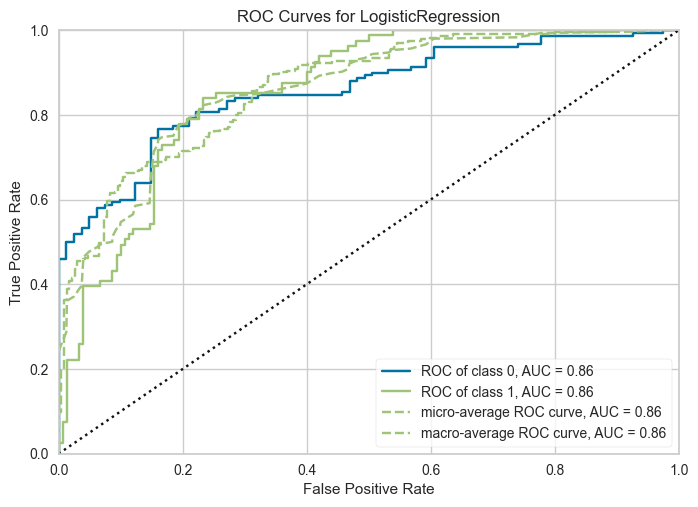

In [32]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
s.plot_model(best, plot = 'auc')

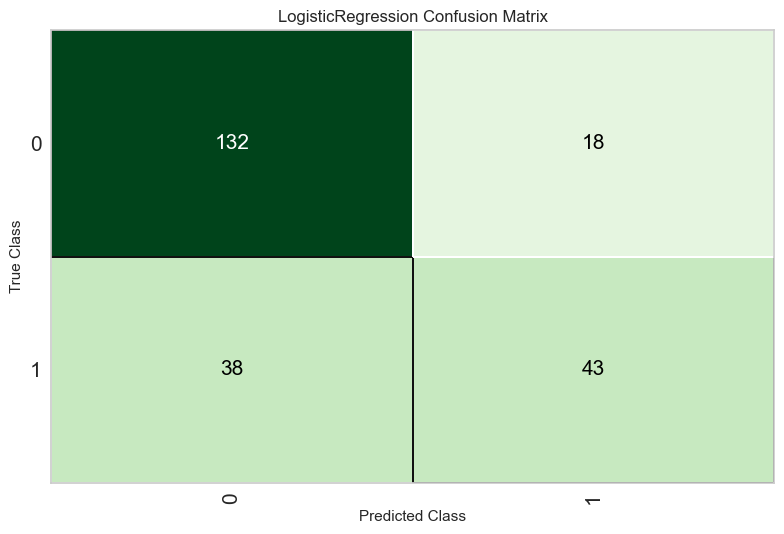

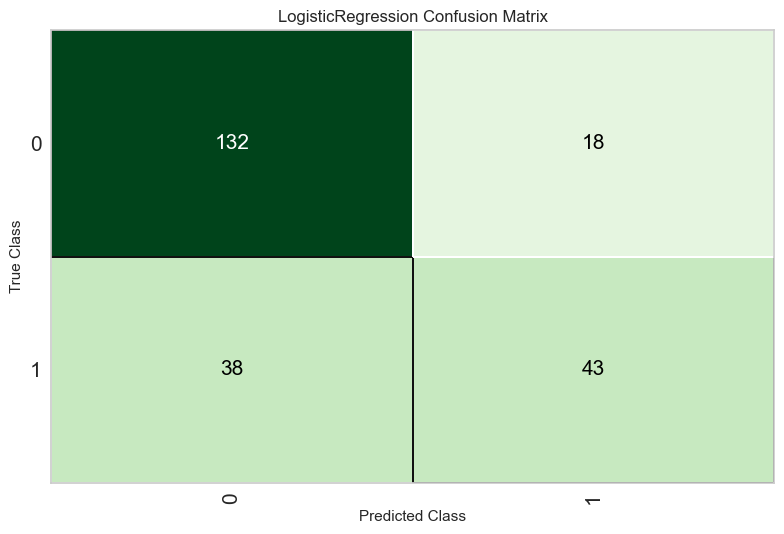

In [33]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [34]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6393
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5984
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9244


In [35]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9419
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9454
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8394


In [36]:
# functional API
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score_0,prediction_score_1
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.3060,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9419,0.0581
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.2024,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9454,0.0546
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.1606,0.8394


In [37]:
# functional API
save_model(best, 'my_best_pipeline')

# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          

In [38]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              mi...
                                                   

In [39]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [41]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [42]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1240
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3470
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.1300
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.2040
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0920
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0850
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0530
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0480
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0380
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0530


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1210
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3390
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.1250
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1950
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0730
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0500
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0530
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0380
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0400
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0450


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [43]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [44]:
# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

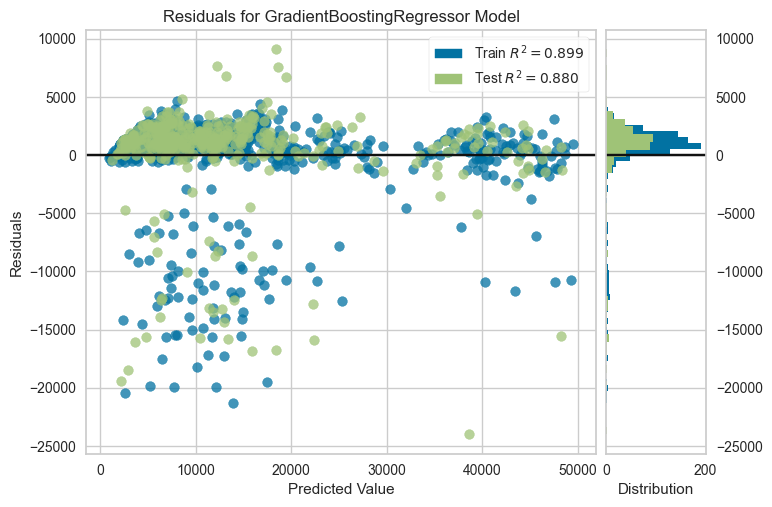

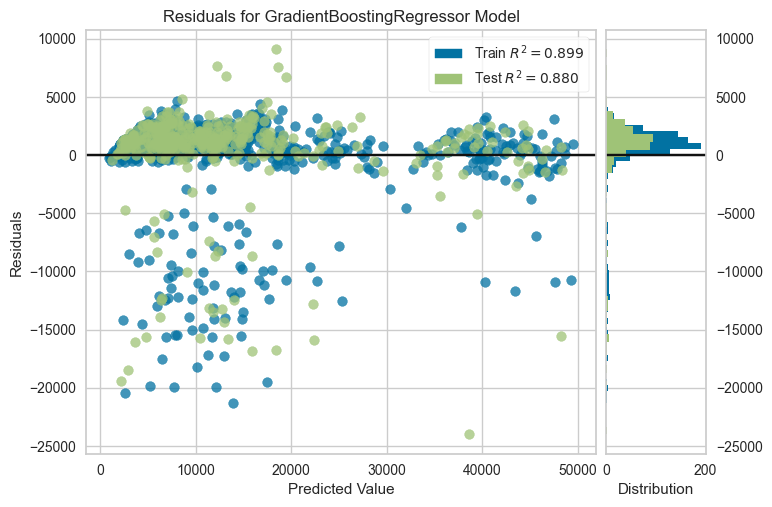

In [45]:
# functional API
plot_model(best, plot = 'residuals')

# OOP API
s.plot_model(best, plot = 'residuals')

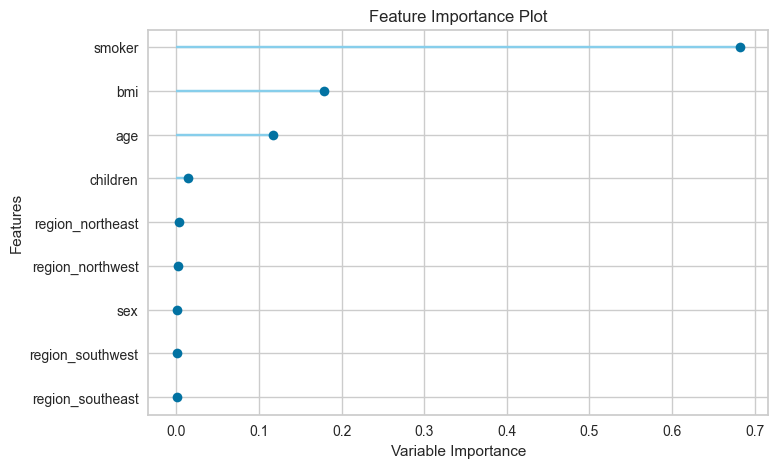

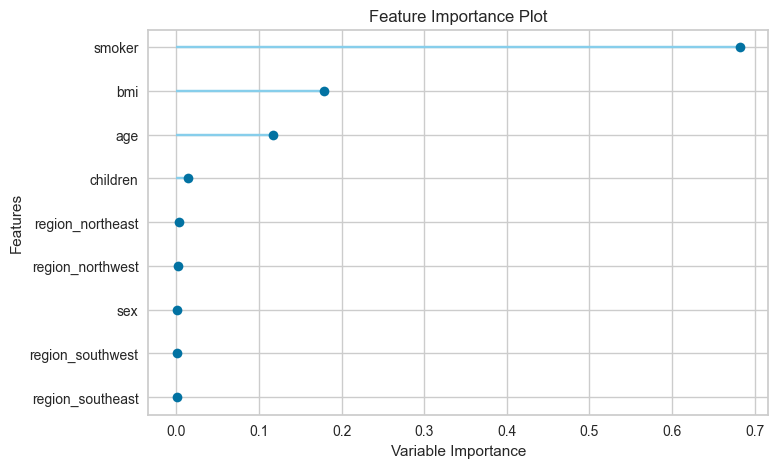

In [46]:
# functional API
plot_model(best, plot = 'feature')

# OOP API
s.plot_model(best, plot = 'feature')

In [47]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,9264.152793
973,19,female,40.500000,0,no,southwest,1759.338013,2604.919960
1250,24,male,29.830000,0,yes,northeast,18648.421875,18639.490954
887,36,female,30.020000,0,no,northwest,5272.175781,5117.185514


In [48]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2219.8743,15663377.0613,3957.6985,0.8931,0.3650,0.2634


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2219.8743,15663377.0613,3957.6985,0.8931,0.3650,0.2634


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.923828,18464.334448
1,18,male,33.770000,1,no,southeast,1725.552246,4020.345384
2,28,male,33.000000,3,no,southeast,4449.461914,6555.388388
3,33,male,22.705000,0,no,northwest,21984.470703,9627.045725
4,32,male,28.879999,0,no,northwest,3866.855225,3325.531292


In [49]:
# functional API
save_model(best, 'my_best_pipeline')

# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sex', 'smoker', 'reg...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0

In [50]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(excl...
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0

In [51]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [52]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,Session id,5543
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [53]:
from pycaret.clustering import ClusteringExperiment
s = ClusteringExperiment()
s.setup(data, normalize = True)

,Description,Value
0,Session id,718
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [54]:
# functional API
kmeans = create_model('kmeans')

# OOP API
kmeans = s.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [55]:
# functional API
evaluate_model(kmeans)

# OOP API
s.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

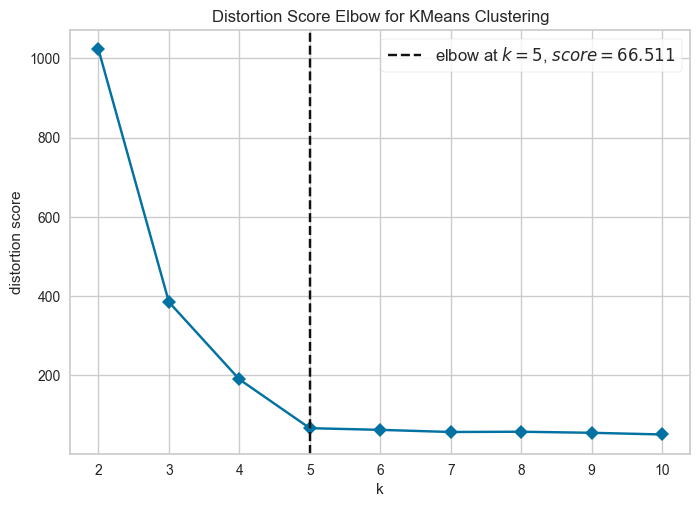

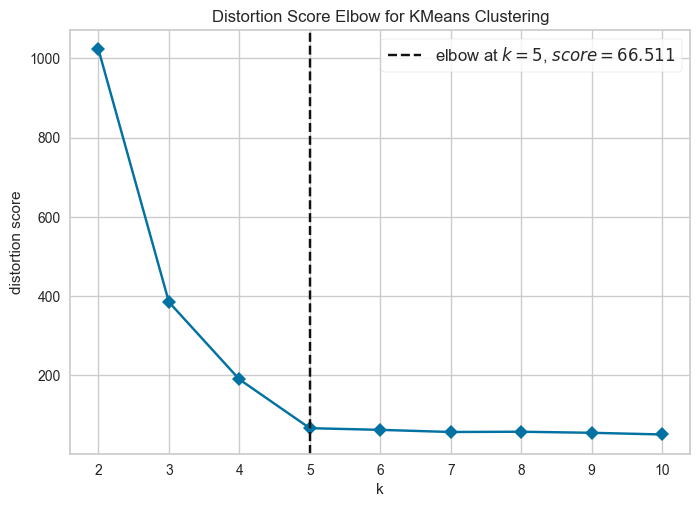

In [56]:
# functional API
plot_model(kmeans, plot = 'elbow')

# OOP API
s.plot_model(kmeans, plot = 'elbow')

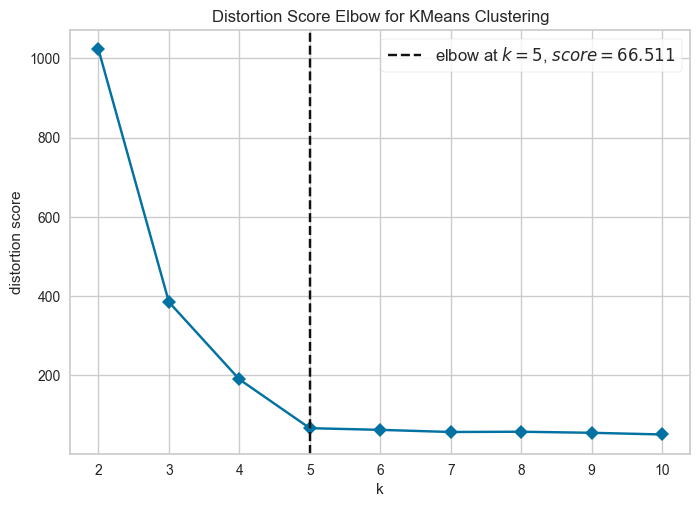

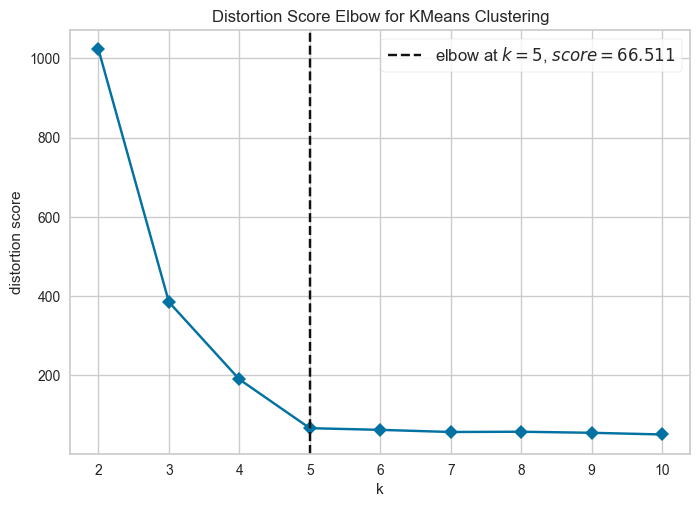

In [57]:
# functional API
plot_model(kmeans, plot = 'elbow')

# OOP API
s.plot_model(kmeans, plot = 'elbow')

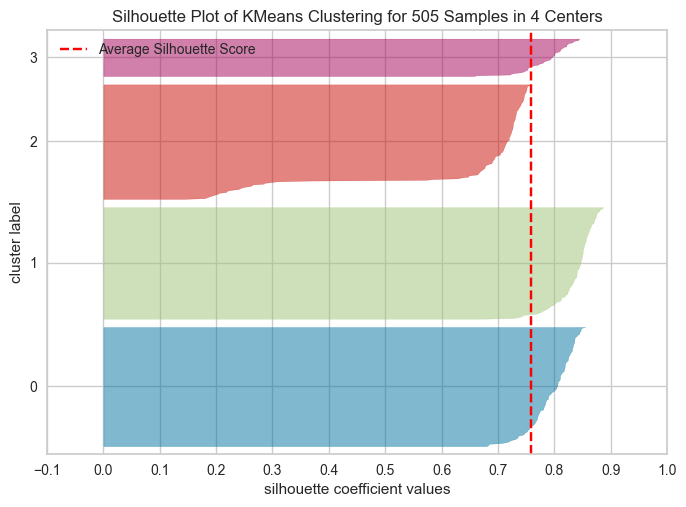

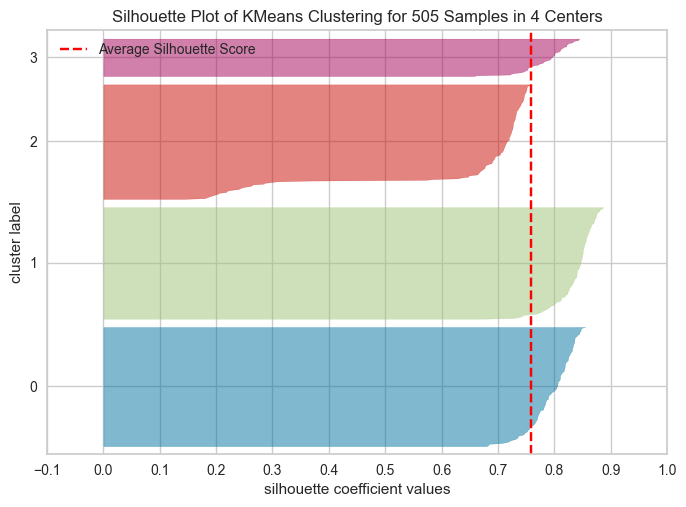

In [58]:
# functional API
plot_model(kmeans, plot = 'silhouette')

# OOP API
s.plot_model(kmeans, plot = 'silhouette')

In [59]:
# functional API
result = assign_model(kmeans)
result.head()

# OOP API
result = s.assign_model(kmeans)
result.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 0
1,59,81799,0.791082,5417.661621,Cluster 0
2,62,74751,0.702657,9258.993164,Cluster 0
3,59,74373,0.765680,7346.334473,Cluster 0
4,87,17760,0.348778,16869.507812,Cluster 1


In [60]:
# functional API
predictions = predict_model(kmeans, data = data)
predictions.head()

# OOP API
predictions = s.predict_model(kmeans, data = data)
predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,-0.042287,0.062733,1.103593,-1.072467,Cluster 0
1,-0.000821,0.174811,1.102641,-1.303473,Cluster 0
2,0.123577,-0.021200,0.761727,-0.526556,Cluster 0
3,-0.000821,-0.031712,1.004705,-0.913395,Cluster 0
4,1.160228,-1.606165,-0.602619,1.012686,Cluster 1


In [61]:
# functional API
save_model(kmeans, 'kmeans_pipeline')

# OOP API
s.save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[]...
                                                               keep_empty_features=False,
                                          

In [62]:
# functional API
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

# OOP API
loaded_model = s.load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Income', 'SpendingScore',
                                             'Savings'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                                              keep_empty_features=False,
   